# Assignment 1

## *How can we control the increasing number of accidents in New York?*

In [103]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [104]:
with open(".\\data\\borough_data.json") as f:
    dct=json.load(f)

<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

-------

In [105]:
df=pd.read_csv("data/accidents.csv",sep=';')

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [106]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 :</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[ x] Road safety audits at high risk locations</li>
<li>[ x] Expansion in the cycle track network</li>
<li>[ ] Targeted education and awareness initiatives</li>
<li>[ x] Creation of pedestrian refuge islands</li>
<li>[x ] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

-------

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 :</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

The number of accident has not increased overtime. It tends to slightly descrease overtime.

In [107]:
df["DATEf"]=pd.to_datetime(df["DATE"],format="%m/%d/%Y")

In [108]:
import datetime as dt

In [109]:
df["bymonth"]=df["DATEf"].dt.to_period(freq="m")
df.head()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATEf,bymonth
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,2018-09-26,2018-09
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,2018-09-25,2018-09
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,2019-08-22,2019-08
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-09-23,2018-09
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,2019-08-20,2019-08


In [110]:
nb=df.bymonth.value_counts().sort_index()
pe=nb.to_frame()


<AxesSubplot:>

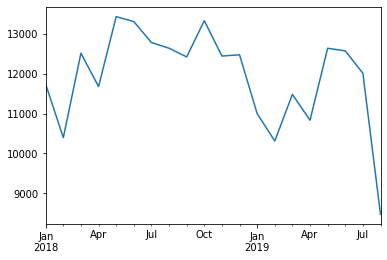

In [111]:
nb.plot()

-------

<h3>Exercise 3 :</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

-------Febuary is the month which has the lowest number of accidents. I think the reason is that Febuary is the winter month which has many cold days, so people tend to stay at home.Therefore, Febuary has lowest accidents number.

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

-------

<AxesSubplot:>

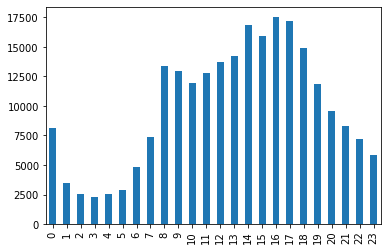

In [112]:
df["HOUR"]=pd.to_datetime(df['TIME'], format='%H:%M').dt.hour
df.HOUR.value_counts().sort_index().plot.bar()


<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

In [113]:
# by this approach, we can not find the place where the accident often occurred to do something for preventing accident reoccurrence.
# There were no statistical tools applied, so we could have bias information by using a graphically approach. However, graphicalyy approach can give us general ideas about the data.

-------

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**
# The number of accidents on weekend is lower on the weekday.Friday has the  highest # number of accidents.


-------

<AxesSubplot:>

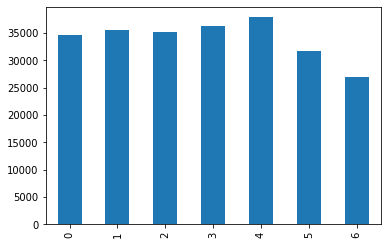

In [114]:
df["WEEK"]=pd.to_datetime(df['DATE'], format="%m/%d/%Y").dt.weekday
df.WEEK.value_counts().sort_index().plot.bar()

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

**Answer.**

In [115]:
# From the total of accidents in each borough plot, BROOKLYN has the highest number of accidents, 
# State Island has the lowest number of accidents.

#From plot one of the accidents per square mile per borough, manhattan has the highest concentrartion of accidents. 
#State Island has the lowest concentration of accidents.



-------

In [116]:
dct["bronx"]=dct.pop("the bronx")

<AxesSubplot:title={'center':'The total number of accidents in each borough'}>

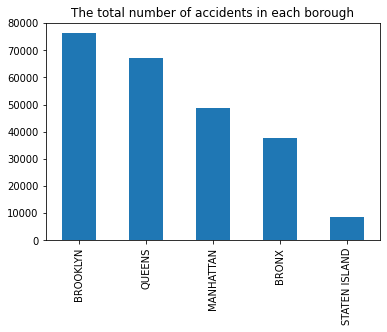

In [117]:
vl=df["BOROUGH"].value_counts().to_frame()
a=[]
for i in vl.index:
    e=vl.loc[i]["BOROUGH"]/dct[i.lower()]["area"]
    a.append(e)

vl["accident_per_area"]=a

df["BOROUGH"].value_counts().plot.bar(title="The total number of accidents in each borough")



<AxesSubplot:title={'center':'plot one of the accidents per square mile per borough'}>

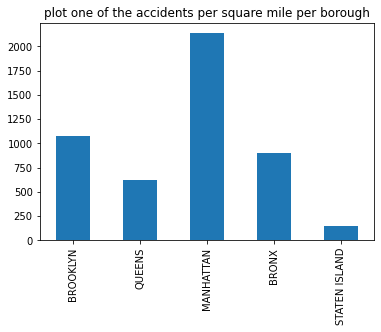

In [118]:
#plot one of the accidents per square mile per borough
vl.accident_per_area.plot(kind="bar",title="plot one of the accidents per square mile per borough")

<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

-------

# Hour has most accident for each borough :

BROOKLYN :16
QUEENS    :17
MANHATTAN :14
BRONX    :16
STATEN IN :16


# the number of accident is higher from 8-9 , and 14-18 in BRONX,BROKLYN,QUEENS.However, in MANHATTAN, AND STATEN ISLAND , THE HOUR FROM 9-18 IS LIKELY THE SAME.

# We should concentrate at this different time for BRONX,BROKLYN,QUEENS borough, but we dont need to concentrate for MANHATTAN, AND STATEN ISLAND borough.

C:\Users\caoth\.virtualenvs\calculator-KBkRpKlT\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


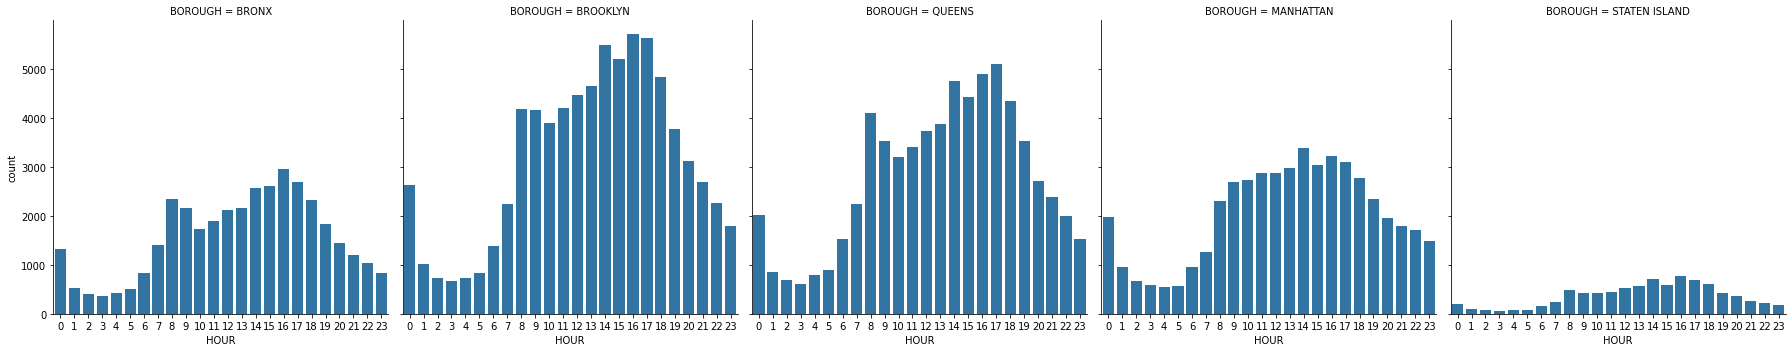

In [119]:
g=sns.FacetGrid(df,col="BOROUGH",height=5)

g.map(sns.countplot,"HOUR")


<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

**Answer.**

<h3>Exercise 9 :</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

# Answer: Derver Inattention/ Distraction is the factor which cause the most accidents.

-------

In [120]:
df.shape

(238522, 28)

In [121]:
sa=pd.concat([df["CONTRIBUTING FACTOR VEHICLE 1"],df["CONTRIBUTING FACTOR VEHICLE 2"],df["CONTRIBUTING FACTOR VEHICLE 3"],df["CONTRIBUTING FACTOR VEHICLE 4"],df["CONTRIBUTING FACTOR VEHICLE 5"]])
da=sa.reset_index().drop_duplicates().reset_index()
da=da.pop(0).dropna()
da=da.to_frame()

da=da.rename(columns={0:'contributors'})
da=da[da["contributors"]!="Unspecified"]
da.value_counts().head(20)

contributors                                         
Driver Inattention/Distraction                           61752
Failure to Yield Right-of-Way                            19641
Following Too Closely                                    17293
Backing Unsafely                                         14835
Passing Too Closely                                      12631
Passing or Lane Usage Improper                           11808
Other Vehicular                                           8860
Unsafe Lane Changing                                      6643
Turning Improperly                                        6626
Traffic Control Disregarded                               4687
Driver Inexperience                                       4152
Unsafe Speed                                              3469
Reaction to Uninvolved Vehicle                            3034
Alcohol Involvement                                       2491
View Obstructed/Limited                                   2345
O

<h3>Exercise 10 :</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

**Answer.**

# Sedan is the vehicle types involved in accidents per in all boroughs.

In [122]:
k=df.groupby("BOROUGH")
l=df.BOROUGH.unique()
for i in l:
    dt=k.get_group(i)

    qa=pd.concat([dt["VEHICLE TYPE CODE 1"],dt["VEHICLE TYPE CODE 2"],dt["VEHICLE TYPE CODE 3"],dt["VEHICLE TYPE CODE 4"],dt["VEHICLE TYPE CODE 5"]])
    qa=qa.reset_index().drop_duplicates().reset_index()
    qa=qa.pop(0).dropna()
    qa=qa.to_frame()

    qa=qa.rename(columns={0:'contributors'})
    qa=qa[qa["contributors"]!="Unspecified"]
    w=qa.value_counts()
    print("in borough",i,w.head(2))
    

in borough BRONX contributors                       
Sedan                                  19652
Station Wagon/Sport Utility Vehicle    15434
dtype: int64
in borough BROOKLYN contributors                       
Sedan                                  39459
Station Wagon/Sport Utility Vehicle    32262
dtype: int64
in borough QUEENS contributors                       
Sedan                                  35103
Station Wagon/Sport Utility Vehicle    31647
dtype: int64
in borough MANHATTAN contributors                       
Sedan                                  20727
Station Wagon/Sport Utility Vehicle    16432
dtype: int64
in borough STATEN ISLAND contributors                       
Sedan                                  4773
Station Wagon/Sport Utility Vehicle    3371
dtype: int64


-------

<h3>Exercise 11 :</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[x ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[ x] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**

-------

<h3>Exercise 12 :</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

# Station wagon/Spot Utility is most often involved in deaths.



In [123]:
df["TOTAL NUMBER OF DEATHS"]=df["NUMBER OF PEDESTRIANS KILLED"]+df["NUMBER OF MOTORIST KILLED"]+df["NUMBER OF CYCLIST KILLED"]
da=df["TOTAL NUMBER OF DEATHS"].unique()
da

array([0, 1, 2], dtype=int64)

In [124]:
re = pd.Series([])
for i in da:
    dfd=df[df["TOTAL NUMBER OF DEATHS"]==i]
    h=pd.concat([dfd["VEHICLE TYPE CODE 1"],dfd["VEHICLE TYPE CODE 2"],dfd["VEHICLE TYPE CODE 3"],dfd["VEHICLE TYPE CODE 4"],dfd["VEHICLE TYPE CODE 5"]])
    ha=h.value_counts()*i
    
    re=re.add(ha,fill_value=0)
   

re.sort_values(ascending=False).head(10)

C:\Users\caoth\AppData\Local\Temp/ipykernel_22960/3231958846.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  re = pd.Series([])


Station Wagon/Sport Utility Vehicle    100.0
Sedan                                   79.0
PASSENGER VEHICLE                       33.0
SPORT UTILITY / STATION WAGON           26.0
Motorcycle                              22.0
Bike                                    19.0
Bus                                     10.0
Pick-up Truck                            8.0
Box Truck                                8.0
Taxi                                     5.0
dtype: float64

<AxesSubplot:>

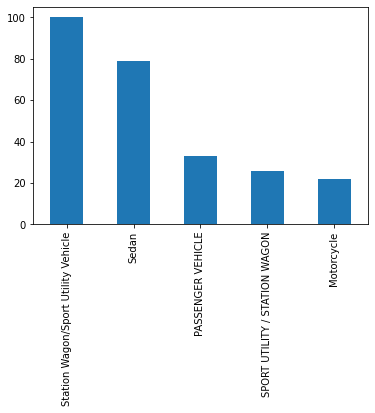

In [125]:
gg=re.sort_values(ascending=False).head(5)
gg.plot(kind="bar")

-------